# IBM AI Workflow lab 2

This unit covers the topic of data visualization and this course is taught in Python. There are numerous frameworks out there and it is reasonable to use other languages, like R, to carry out data visualization. The reason for using matplotlib is that it is most common tool once you have accounted for direct and indirect usage. See the visualization below to get a better understanding how matplotlib fits into the Python landscape of visualization tools.

In [1]:
import os
import re
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline

SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

## specify the directory you saved the data and images in
DATA_DIR = os.path.join("D:\data_science\Data-Visualization-Unit-Local","data")
IMAGE_DIR = os.path.join("D:\data_science\Data-Visualization-Unit-Local","images")

In [2]:
## load the data and print the shape
df = pd.read_csv(os.path.join(DATA_DIR, "world-happiness.csv"), index_col=0)
print("df: {} x {}".format(df.shape[0], df.shape[1]))

## clean up the column names
df.columns = [re.sub("\s+","_",col) for col in df.columns.tolist()]

## check the first few rows
df.head(n=4)

df: 495 x 12


,Country,Region,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,Year
0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015
1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015
2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015
3,Angola,Sub-Saharan Africa,137.0,4.033,0.75778,0.86040,0.16683,0.10384,0.07122,0.12344,1.94939,2015


In [3]:
## missing values summary
print("Missing Value Summary\n{}".format("-"*35))
print(df.isnull().sum(axis = 0))

Missing Value Summary
-----------------------------------
Country                           0
Region                            0
Happiness_Rank                   25
Happiness_Score                  25
Economy_(GDP_per_Capita)         25
Family                           25
Health_(Life_Expectancy)         25
Freedom                          25
Trust_(Government_Corruption)    25
Generosity                       25
Dystopia_Residual                25
Year                              0
dtype: int64


In [4]:
## drop the rows that have NaNs
print("Original Matrix:", df.shape)
df.dropna(inplace=True)
print("After NaNs removed:", df.shape)

Original Matrix: (495, 12)
After NaNs removed: (470, 12)


# The data

The original data are produced by the UN Sustainable Development Solutions Network (SDSN) and the report is compiled and available at https://worldhappiness.report. The following is the messaging on the report website:

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. The report is produced by the United Nations Sustainable Development Solutions Network in partnership with the Ernesto Illy Foundation.

The World Happiness Report was written by a group of independent experts acting in their personal capacities. Any views expressed in this report do not necessarily reflect the views of any organization, agency or program of the United Nations.

so knowing this it makes sense to sort the data.

In [5]:
df.sort_values(['Year', "Happiness_Score"], ascending=[True, False], inplace=True)
df.head(n=4)

,Country,Region,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual,Year
141,Switzerland,Western Europe,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
60,Iceland,Western Europe,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
38,Denmark,Western Europe,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
108,Norway,Western Europe,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015


## EDA and pandas

In [6]:
columns_to_show = ["Happiness_Score","Health_(Life_Expectancy)"]
pd.pivot_table(df, index= 'Year', values=columns_to_show,aggfunc='mean').round(3)

,Happiness_Score,Health_(Life_Expectancy)
Year,,
2015,5.376,0.630
2016,5.382,0.558
2017,5.354,0.551


In [7]:
df.groupby(['Year'])[columns_to_show].mean().round(3)

,Happiness_Score,Health_(Life_Expectancy)
Year,,
2015,5.376,0.630
2016,5.382,0.558
2017,5.354,0.551


In [8]:
 pd.pivot_table(df, index = ['Region', 'Year'], values=columns_to_show).round(3)

Happiness_Score  \
Region                          Year                    
Australia and New Zealand       2015            7.285   
                                2016            7.323   
                                2017            7.299   
Central and Eastern Europe      2015            5.333   
                                2016            5.371   
                                2017            5.410   
Eastern Asia                    2015            5.626   
                                2016            5.624   
                                2017            5.647   
Latin America and Caribbean     2015            6.145   
                                2016            6.102   
                                2017            5.958   
Middle East and Northern Africa 2015            5.407   
                                2016            5.386   
                                2017            5.370   
North America                   2015            7.273   
                                2016            7.254   
                                2017            7.155   
Southeastern Asia               2015            5.317   
                                2016            5.339   
                                2017            5.445   
Southern Asia                   2015            4.581   
                                2016            4.563   
                                2017            4.628   
Sub-Saharan Africa              2015            4.203   
                                2016            4.136   
                                2017            4.112   
Western Europe                  2015            6.690   
                                2016            6.686   
                                2017            6.704   

                                      Health_(Life_Expectancy)  
Region                          Year                            
Australia and New Zealand       2015                     0.920  
                                2016                     0.841  
                                2017                     0.830  
Central and Eastern Europe      2015                     0.719  
                                2016                     0.632  
                                2017                     0.636  
Eastern Asia                    2015                     0.877  
                                2016                     0.807  
                                2017                     0.808  
Latin America and Caribbean     2015                     0.704  
                                2016                     0.613  
                                2017                     0.611  
Middle East and Northern Africa 2015                     0.706  
                                2016                     0.616  
                                2017                     0.606  
North America                   2015                     0.884  
                                2016                     0.803  
                                2017                     0.804  
Southeastern Asia               2015                     0.677  
                                2016                     0.561  
                                2017                     0.582  
Southern Asia                   2015                     0.541  
                                2016                     0.454  
                                2017                     0.457  
Sub-Saharan Africa              2015                     0.282  
                                2016                     0.240  
                                2017                     0.225  
Western Europe                  2015                     0.909  
                                2016                     0.826  
                                2017                     0.825

Use pd.qcut() to bin the data by Happiness_Rank and create a pivot table that summarizes Happiness_Score and Health_(Life_Expectancy) with respect to Region.

In [9]:
df['Happiness_Rank_bins'] = pd.qcut(df['Happiness_Score'], 5, labels = ['Very Unhappy', 'Unhappy', 'Happy/Unhappy', 'Happy', 'Very Happy'])

pd.pivot_table(df, index = ['Happiness_Rank_bins', 'Region'], values=columns_to_show).round(3).sort_values('Happiness_Score', ascending = False)

Happiness_Score  \
Happiness_Rank_bins Region                                             
Very Happy          Australia and New Zealand                  7.303   
                    North America                              7.227   
                    Western Europe                             7.146   
                    Middle East and Northern Africa            6.918   
                    Latin America and Caribbean                6.769   
                    Southeastern Asia                          6.608   
                    Central and Eastern Europe                 6.570   
Happy               Middle East and Northern Africa            6.198   
                    Western Europe                             6.131   
                    Latin America and Caribbean                6.089   
                    Southeastern Asia                          6.071   
                    Eastern Asia                               6.065   
                    Central and Eastern Europe                 5.881   
Happy/Unhappy       Latin America and Caribbean                5.440   
                    Western Europe                             5.400   
                    Sub-Saharan Africa                         5.352   
                    Middle East and Northern Africa            5.349   
                    Eastern Asia                               5.344   
                    Central and Eastern Europe                 5.334   
                    Southeastern Asia                          5.250   
                    Southern Asia                              5.209   
Unhappy             Western Europe                             4.945   
                    Eastern Asia                               4.912   
                    Latin America and Caribbean                4.766   
                    Middle East and Northern Africa            4.733   
                    Central and Eastern Europe                 4.703   
                    Southern Asia                              4.614   
                    Sub-Saharan Africa                         4.607   
                    Southeastern Asia                          4.600   
Very Unhappy        Central and Eastern Europe                 4.214   
                    Southeastern Asia                          3.965   
                    Latin America and Caribbean                3.815   
                    Sub-Saharan Africa                         3.795   
                    Southern Asia                              3.750   
                    Middle East and Northern Africa            3.589   

                                                     Health_(Life_Expectancy)  
Happiness_Rank_bins Region                                                     
Very Happy          Australia and New Zealand                           0.864  
                    North America                                       0.830  
                    Western Europe                                      0.848  
                    Middle East and Northern Africa                     0.803  
                    Latin America and Caribbean                         0.741  
                    Southeastern Asia                                   0.862  
                    Central and Eastern Europe                          0.788  
Happy               Middle East and Northern Africa                     0.666  
                    Western Europe                                      0.879  
                    Latin America and Caribbean                         0.607  
                    Southeastern Asia                                   0.653  
                    Eastern Asia                                        0.893  
                    Central and Eastern Europe                          0.657  
Happy/Unhappy       Latin America and Caribbean                         0.609  
                    Western Europe                                      0.852  
                    Sub-Saha

## Essentials of matplotlib

(0.0, 1.3)

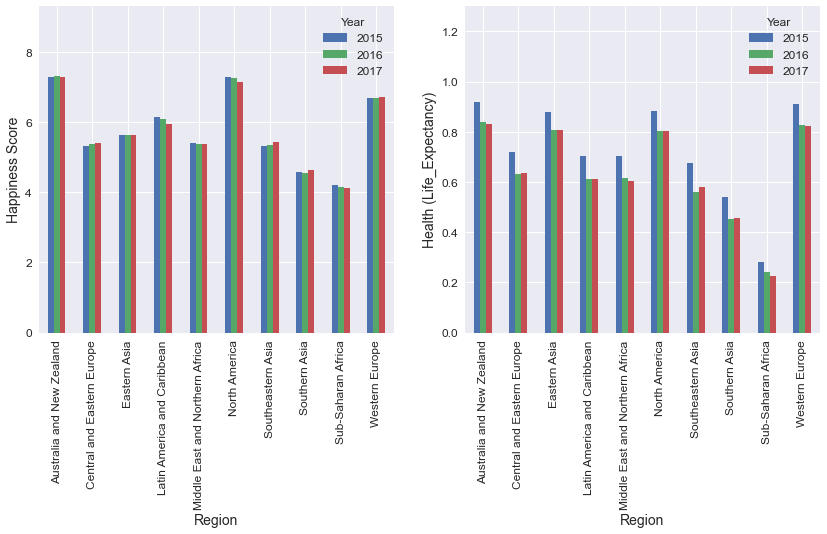

In [10]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

table1 = pd.pivot_table(df, index='Region', columns='Year', values="Happiness_Score")
table1.plot(kind='bar', ax=ax1)
ax1.set_ylabel("Happiness Score");

table2 = pd.pivot_table(df, index='Region', columns='Year', values="Health_(Life_Expectancy)")
table2.plot(kind='bar', ax=ax2)
ax2.set_ylabel("Health (Life_Expectancy)");

## adjust the axis to accomadate the legend
ax1.set_ylim((0,9.3))
ax2.set_ylim((0,1.3))

... data ingestion
... creating plot
D:/data_science/Data-Visualization-Unit-Local\images\happiness-summary.png created.


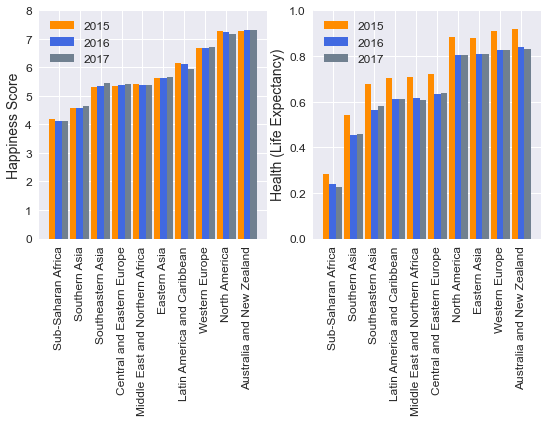

In [11]:
## plot style, fonts and colors
plt.style.use('seaborn')

SMALL_SIZE = 12
MEDIUM_SIZE = 14
LARGE_SIZE = 16
COLORS = ["darkorange","royalblue","slategrey"]

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

DATA_DIR = os.path.join("D:/data_science/Data-Visualization-Unit-Local","data")
IMAGE_DIR = os.path.join("D:/data_science/Data-Visualization-Unit-Local","images")


def run_data_ingestion():
    """
    ready the data for EDA
    """

    print("... data ingestion")
    
    ## load the data and print the shape
    df = pd.read_csv(os.path.join(DATA_DIR,"world-happiness.csv"),index_col=0)

    ## clean up the column names
    df.columns = [re.sub("\s+","_",col) for col in df.columns.tolist()]

    ## drop the rows that have NaNs
    df.dropna(inplace=True)

    ## sort the data for more intuitive visualization
    df.sort_values(['Year', "Happiness_Score"], ascending=[True, False], inplace=True)

    return(df)

def create_subplot(table,ax):
    """
    create a subplot
    """

    table['average'] = (table[2015] + table[2016] + table[2017]) / 3
    regions = np.array(list(table.index))
    year_2015 = table[2015].values
    year_2016 = table[2016].values
    year_2017 = table[2017].values
    averages = table['average'].values
    sorted_inds = np.argsort(averages)

    ## make bar plot 
    N = regions.size
    ind = np.arange(N)
    width = 0.3
    rects1 = ax.bar(ind, year_2015[sorted_inds], width, color=COLORS[0], label='2015')
    rects2 = ax.bar(ind+width, year_2016[sorted_inds], width, color=COLORS[1], label='2016')
    rects3 = ax.bar(ind+width+width, year_2017[sorted_inds], width, color=COLORS[2], label='2017')
    ax.set_xticks(ind+width)
    ax.set_xticklabels(regions[sorted_inds],rotation=90)
    ax.legend(loc='upper left')

def create_plot(df):
    """
    create a two panel subplot that summarizes two features of the data with respect to Year and Region
    """

    print("... creating plot")
    
    columns_to_show = ["Happiness_Score","Health_(Life_Expectancy)"]
    pd.pivot_table(df, index= 'Year',values=columns_to_show,aggfunc='mean').round(3)

    ## ready a figure
    fig = plt.figure(figsize=(9,6))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    ## create first subplot
    table1 = pd.pivot_table(df,index='Region',columns='Year',values="Happiness_Score")
    create_subplot(table1,ax1)
    ax1.set_ylabel("Happiness Score")
    ax1.set_ylim((0,8.0))
    
    ## create second subplot
    table2 = pd.pivot_table(df,index='Region',columns='Year',values="Health_(Life_Expectancy)")
    create_subplot(table2,ax2)
    ax2.set_ylabel("Health (Life Expectancy)")
    ax2.set_ylim((0,1.0))
    
    ## ensure equal aspect ratio
    for ax in [ax1,ax2]:
        ax.set_aspect(1./ax.get_data_ratio()) 

    image_path = os.path.join(IMAGE_DIR,"happiness-summary.png")
    plt.savefig(image_path,bbox_inches='tight',pad_inches = 0,dpi=200)
    print("{} created.".format(image_path))
    
if __name__ == "__main__":

    df = run_data_ingestion()
    create_plot(df)

... data ingestion


Traceback (most recent call last):
  File "D:\data_science\Data-Visualization-Unit-Local\scripts\make-happiness-summary-plot.py", line 127, in <module>
    df = run_data_ingestion()
  File "D:\data_science\Data-Visualization-Unit-Local\scripts\make-happiness-summary-plot.py", line 53, in run_data_ingestion
    df = pd.read_csv(os.path.join(DATA_DIR,"world-happiness.csv"),index_col=0)
  File "C:\Users\XIAOMi\anaconda3\lib\site-packages\pandas\util\_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\XIAOMi\anaconda3\lib\site-packages\pandas\io\parsers\readers.py", line 680, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\XIAOMi\anaconda3\lib\site-packages\pandas\io\parsers\readers.py", line 575, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\XIAOMi\anaconda3\lib\site-packages\pandas\io\parsers\readers.py", line 933, in __init__
    self._engine = self._make_engine(f, self.engine)
  File "C:\Use

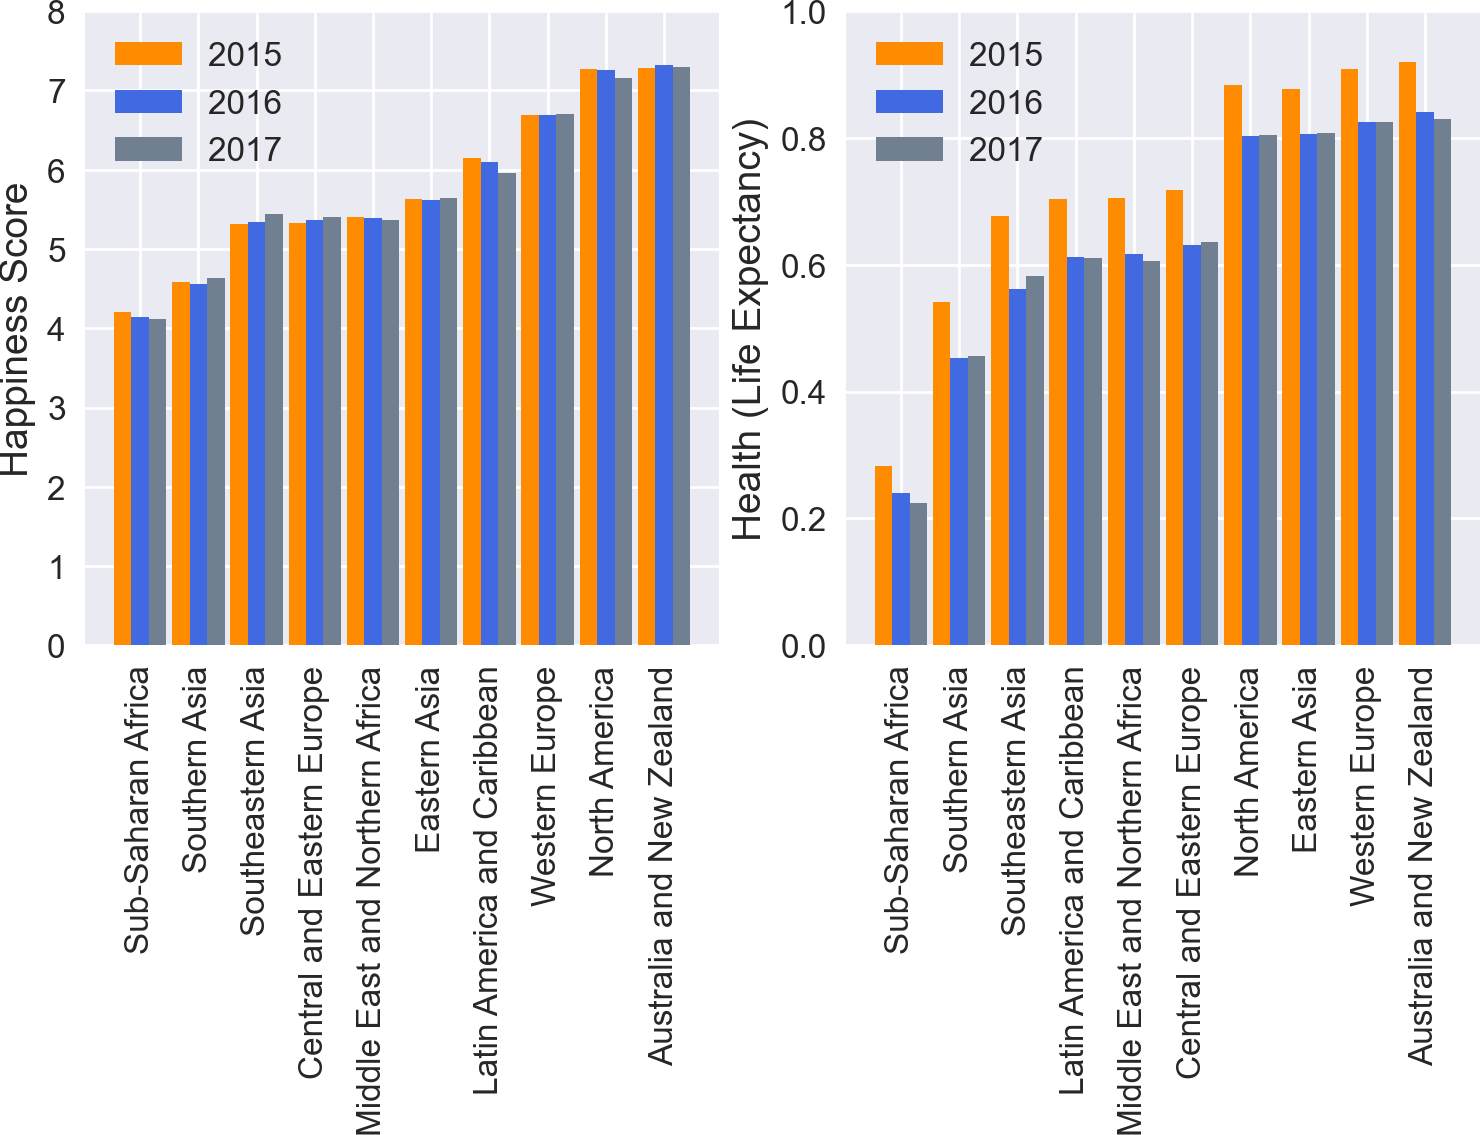

In [12]:
!python D:/data_science/Data-Visualization-Unit-Local/scripts/make-happiness-summary-plot.py
Image(os.path.join(IMAGE_DIR, "happiness-summary.png"), width=800, height=600)

## Pair plots and correlation

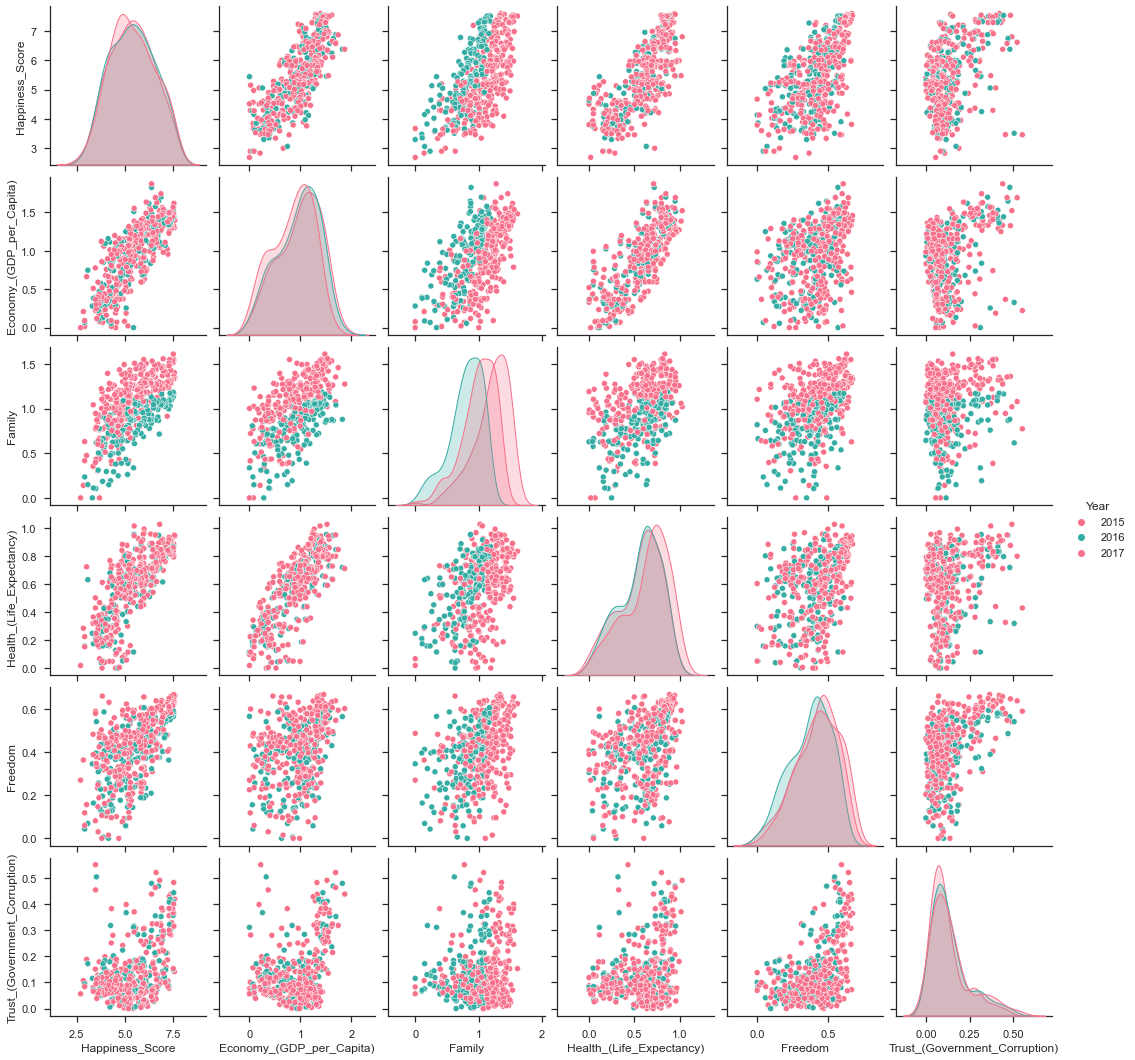

In [13]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

## make a pair plot
columns = ['Happiness_Score','Economy_(GDP_per_Capita)', 'Family', 'Health_(Life_Expectancy)',
           'Freedom', 'Trust_(Government_Corruption)']

axes = sns.pairplot(df,vars=columns,hue="Year",palette="husl")

... data ingestion
... creating plot
D:\data_science\Data-Visualization-Unit-Local\images\happiness-summary.png created.


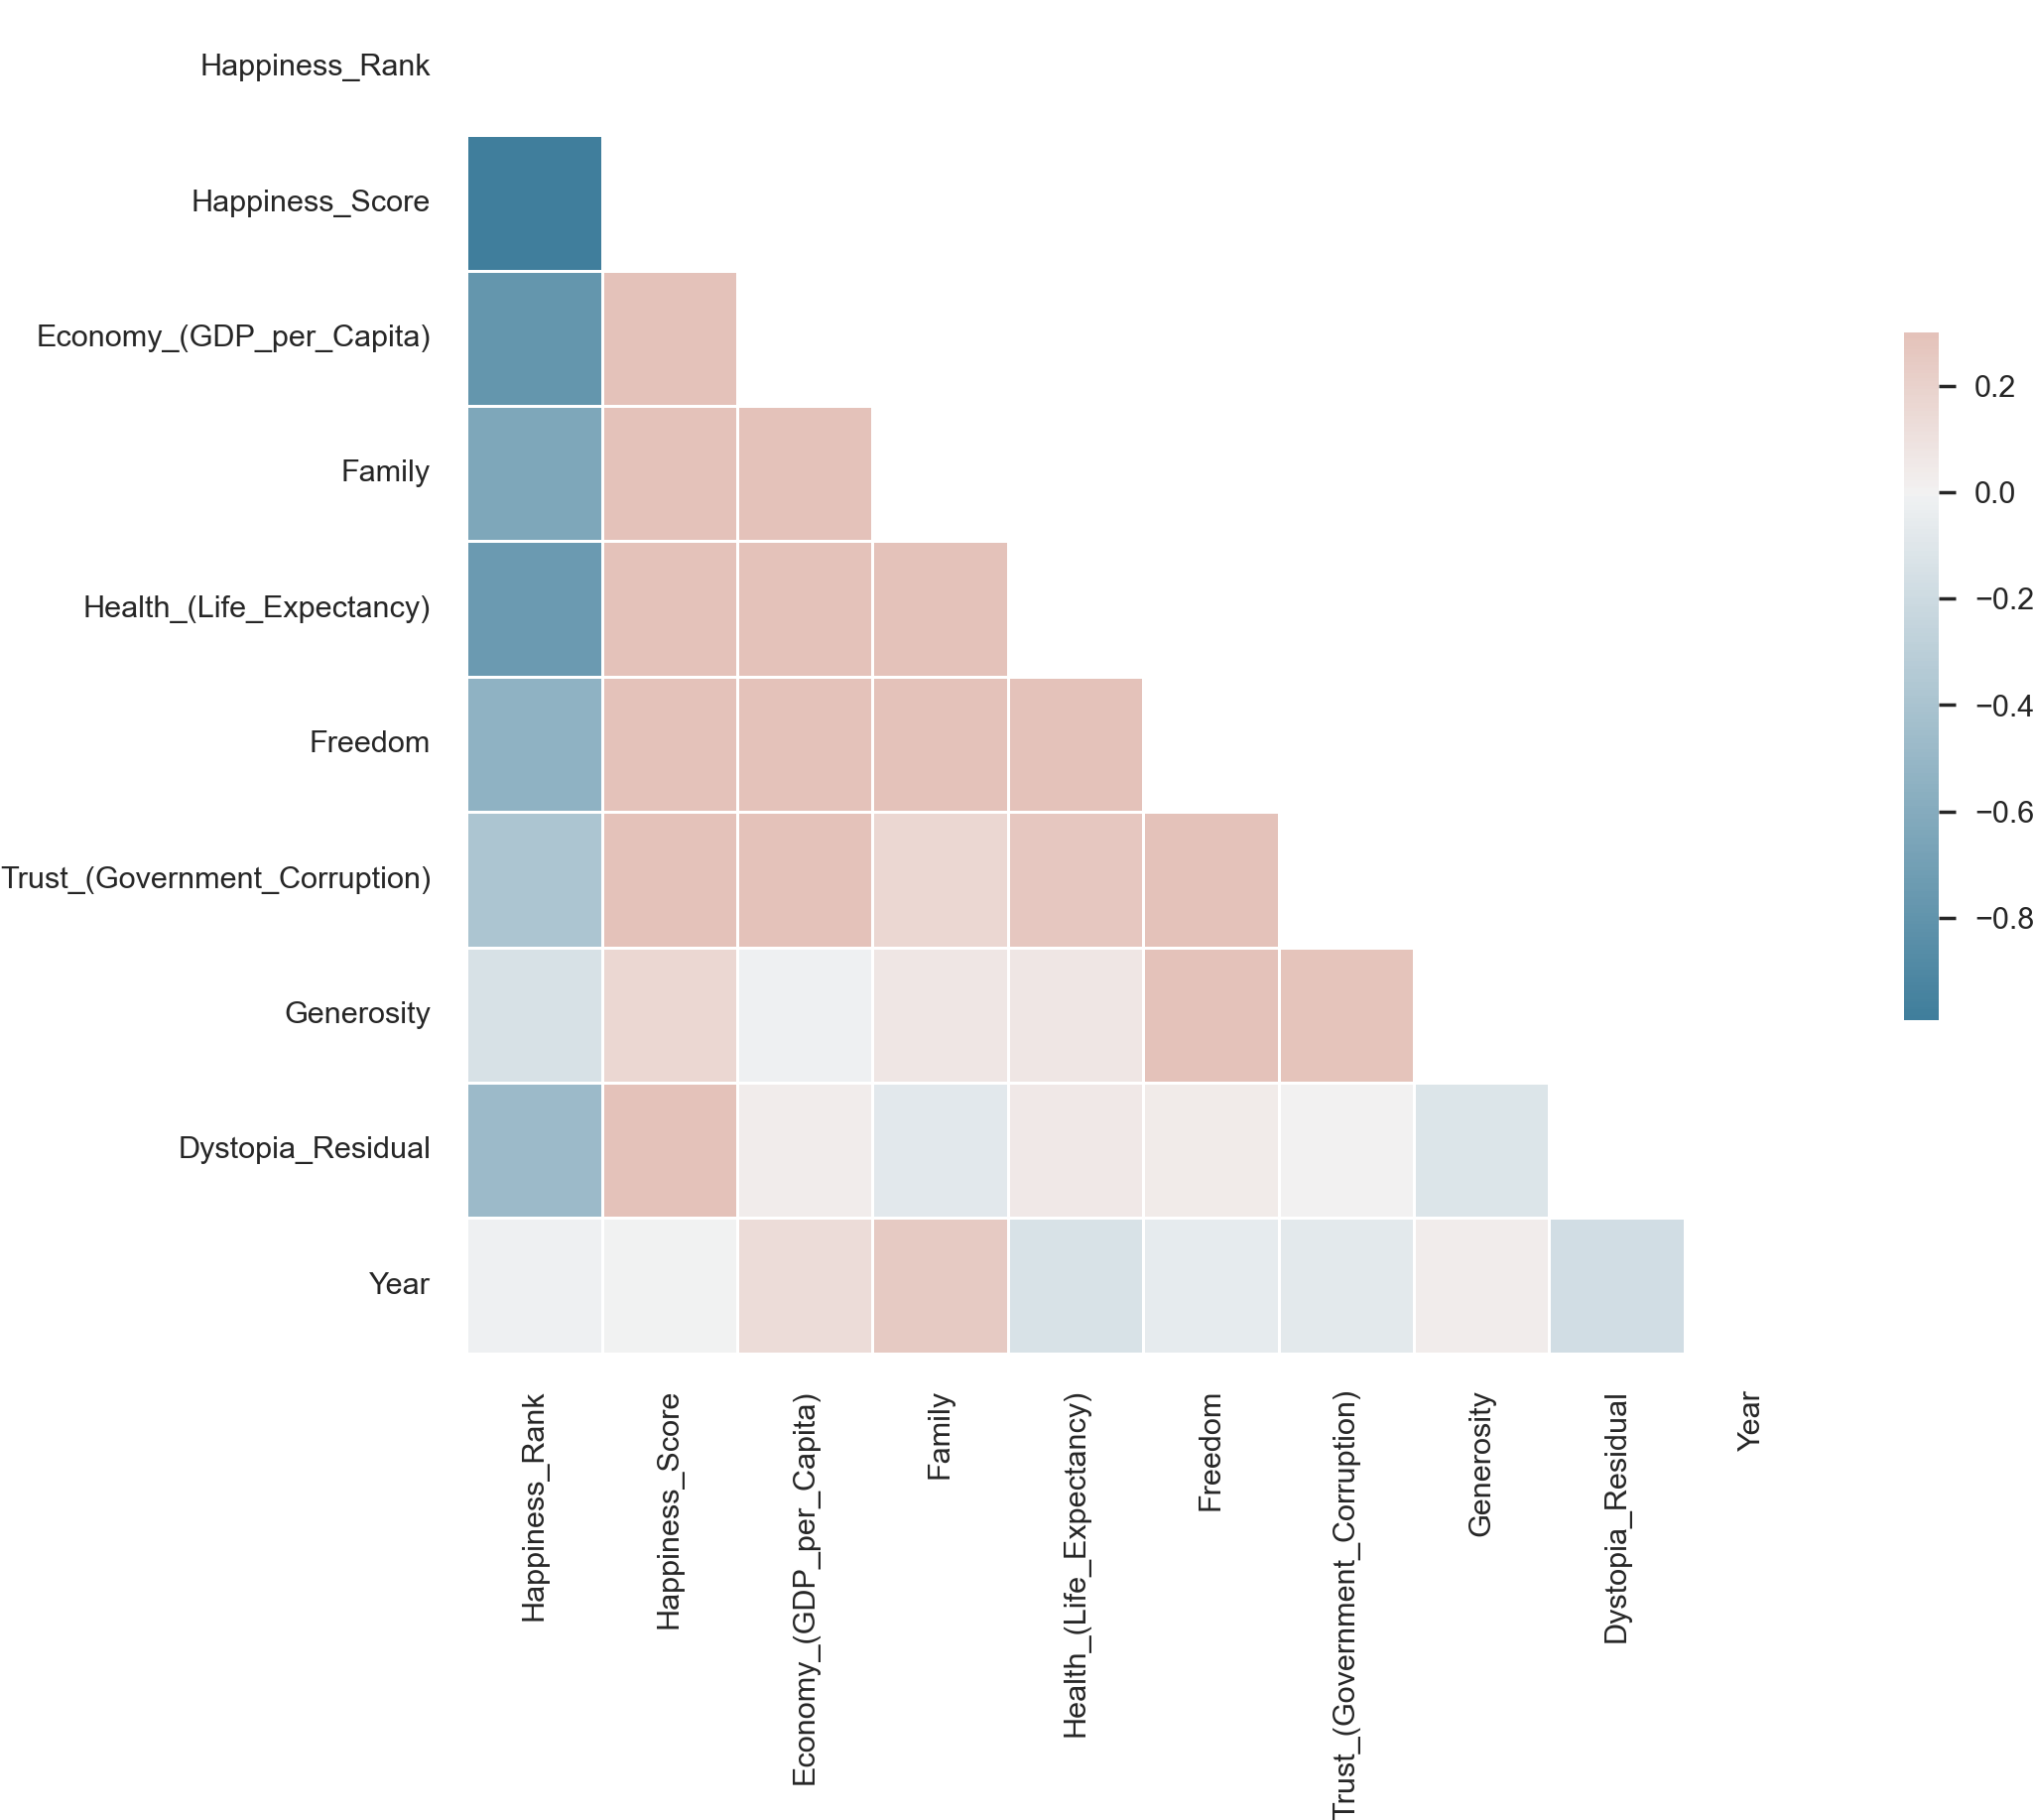

In [15]:
!python D:/data_science/Data-Visualization-Unit-Local/scripts/make-happiness-corr-plot.py
#IMAGE_DIR = os.path.join("D:\не говно\Data-Visualization-Unit-Local","images")
#IMAGE_DIR = os.path.join("D:\\ne-govno\\Data-Visualization-Unit-Local","images")
Image(os.path.join(IMAGE_DIR, "happiness-summary.png"), width=800, height=600)